# Bank Customer Churn Prediction

## Problem Statement

The bank recently saw a steep decline in the number of users of their credit card. Credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.

## Data dictionary

1) CLIENTNUM: Client number. Unique identifier for the customer holding the account

2) Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0

3) Customer_Age: Age in Years

4) Gender: Gender of account holder

5) Dependent_count: Number of dependents

6) Education_Level: Educational Qualification of the account holder

7) Marital_Status: Marital Status of account holder

8) Income_Category: Annual Income Category of the account holder

9) Card_Category: Type of Card

10) Months_on_book: Period of relationship with bank (in months)

11) Total_Relationship_Count: Total no. of products held by the customer

12) Months_Inactive_12_mon: No. of months inactive in the last 12 months

13) Contacts_Count_12_mon: No. of Contacts in the last 12 months

14) Credit_Limit: Credit Limit on the Credit Card

15) Total_Revolving_Bal: Total Revolving Balance on the Credit Card

16) Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)

17) Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)

18) Total_Trans_Amt: Total Transaction Amount (Last 12 months)

19) Total_Trans_Ct: Total Transaction Count (Last 12 months)

20) Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)

21) Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

* If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


#### What is the Average Open to buy?

* 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

#### What is the Average utilization Ratio?

* The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


#### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

* ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the csv file

churn_data = pd.read_csv(r'D:\LDRP\SEM-3\Mini Project 2\BankChurners.csv')

In [3]:
#copying churn data to another dataset

data = churn_data

### Understanding the shape and columns of the dataset

In [4]:
#there are 10127 rows and 22 columns in dataset

data.shape

(10127, 22)

In [5]:
#checking all the column names

data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

In [6]:
#describing information like datatypes and non-null counts of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Viewing first and last five rows of the dataset

In [7]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [8]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,NaN
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,NaN
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,NaN
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,NaN
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,NaN


### Summary of the Dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


#### Observations:

* CLIENTNUM : It is unique identifier for customers and can be dropped as it would not add any information to our analysis.
* Customer_Age : Average age of customers is 46 years, and there is wide range of customers from 26 to 73 years.
* Dependent_count : On average the customers in the data have 2 dependents and maximum of 5 dependents.
* Months_on_book : All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.
* Total_Relationship_Count : All customers use at least one product of the bank, whereas 75% of customers use 5 or less products of the bank.
* Months_Inactive_12_mon : On average customers were inactive for two months in the past 12 months - this shows that the bank customers are active in transactions or usage of cards it would be interesting to see if high inactivity lead to churning of a customer.
* Contacts_Count_12_mon : On average bank and customers interacted twice in the past 12 months.
* Credit_Limit : There's a huge difference between the third quartile and maximum value. The range of credit limit is very wide from 1438 to 34516, customers with high credit limit might be outliers.
* Total_Revolving_Bal : Average revolving balance of customers is 1162, there's not much difference in the third quartile and maximum value.

In [10]:
data.describe(include='object').T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [11]:
#checking the null values in all the columns

data.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [12]:
#checking if there are any duplicate records in dataset

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Length: 10127, dtype: bool

In [13]:
for i in data.describe(include='object'):
    print('Unique values in ',i,'are : ')
    print(data[i].value_counts())
    print('-'*50)

Unique values in  Attrition_Flag are : 
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
Unique values in  Gender are : 
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Unique values in  Education_Level are : 
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Unique values in  Marital_Status are : 
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Unique values in  Income_Category are : 
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
-

**Observations**

* Most of the records are of existing customers.
* Female customers are more than male customers.
* Maximum number of customers are graduates.
* Maximum number of customers are married.
* Most customers lie in the income group of less than $40k.
* Maximum customers have a blue card.

**Missing Values**

* 'Unknown' value of Education_Level, Marital_Status, Income_Category can be considered and treated as missing values.

## EDA

### UNIVARIATE ANALYSIS

In [14]:
# Function to create boxplot and histogram for any input numerical variable.
# This function takes numerical columns as input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10)):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                gridspec_kw = {"height_ratios":(.25, .75)},
                figsize = figsize
                )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet')
    sns.distplot(feature, ax=ax_hist2, color='tab:cyan', kde_kws={'color': 'tab:orange'})
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

#### Observations on Customer_Age

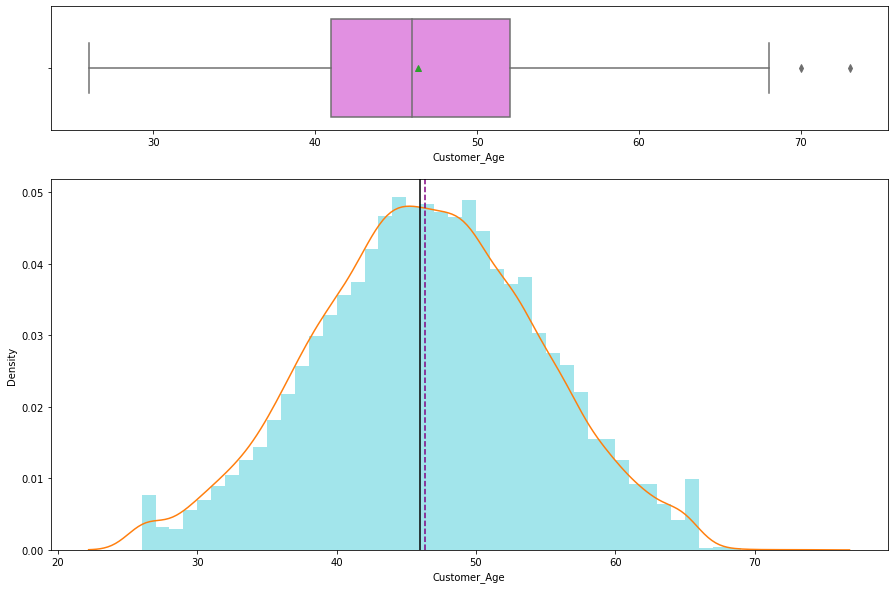

In [15]:
histogram_boxplot(data["Customer_Age"])

* The distribution of Customer_Age is normally distributed with mean and median at 46 years.
* From the boxplot, we can see that there are a few outliers.

#### Observations on Dependent_count

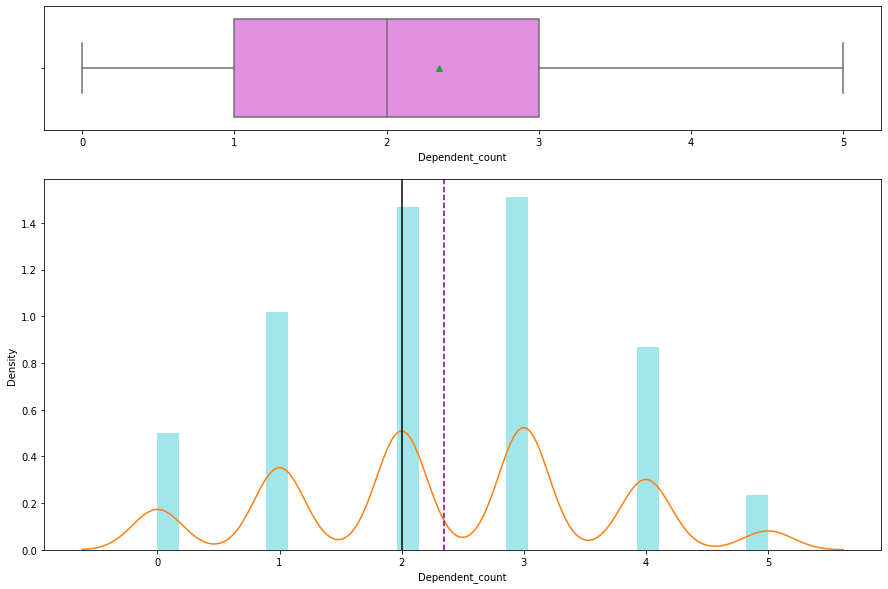

In [16]:
histogram_boxplot(data['Dependent_count'])

* Data is normally distributed.
* From the boxplot we can see that there are no outliers.

#### Observations on Months_on_book

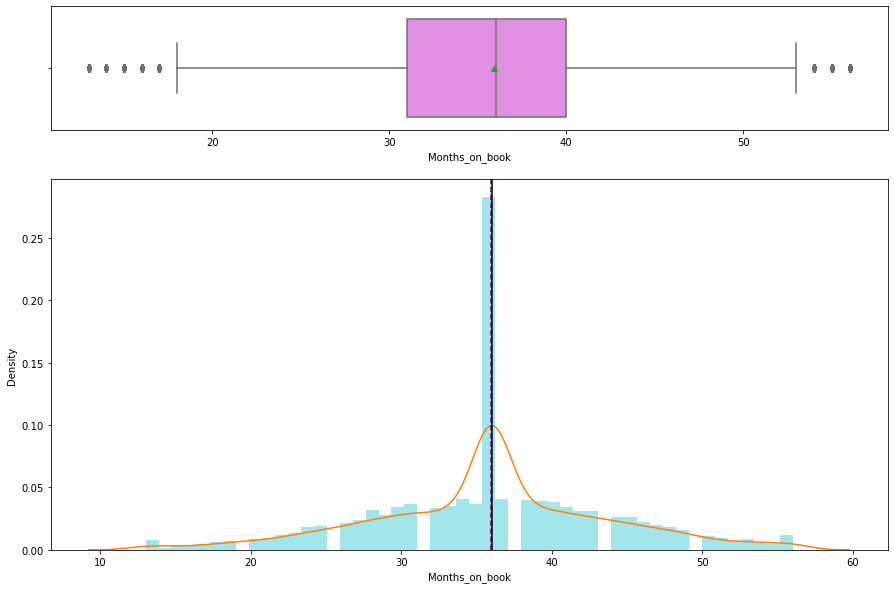

In [17]:
histogram_boxplot(data['Months_on_book'])

* Most customers are with the bank for 36 months i.e. 3 years.
* From the boxplot we can see that there are outliers on both sides of the whiskers.

#### Observations on Total_Relationship_Count

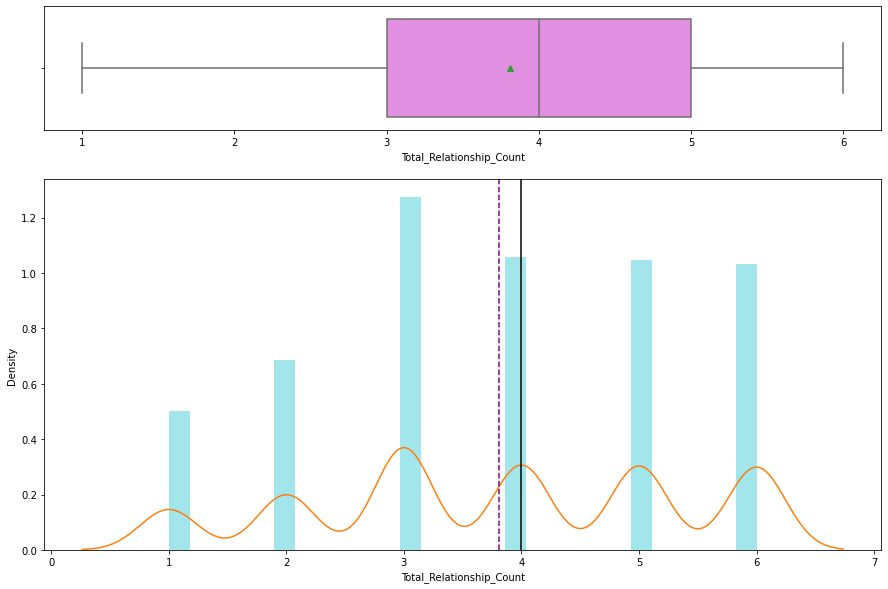

In [18]:
histogram_boxplot(data['Total_Relationship_Count'])

* Most of the customers are having 3 or more than three products of the bank.
* From the boxplot we can see that there are no outliers.

#### Observations on Months_Inactive_12_mon

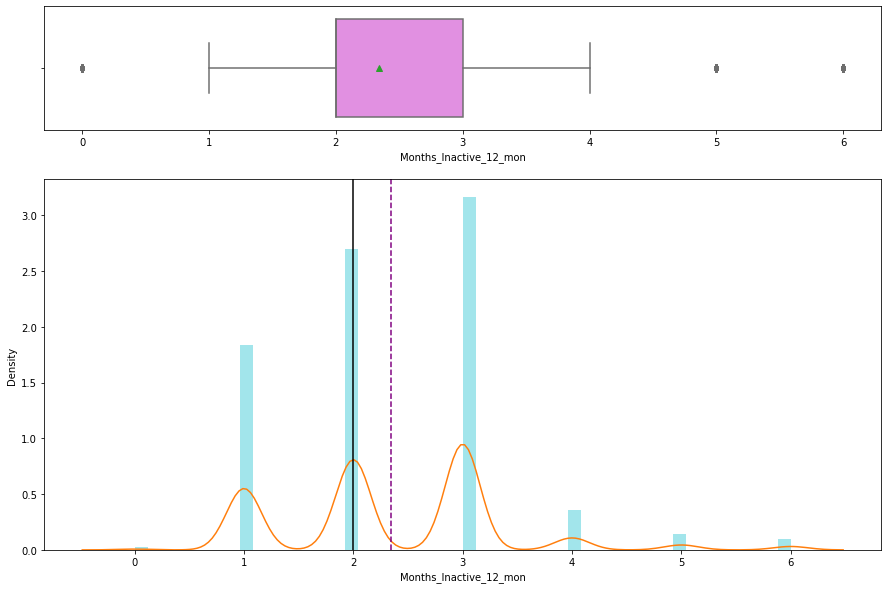

In [19]:
histogram_boxplot(data['Months_Inactive_12_mon'])

* Most of the customers are inactive for 1-3 months within 12 months.
* From the boxplot we can see that there are some outliers on both sides of the whiskers.

#### Observations on Contacts_Count_12_mon

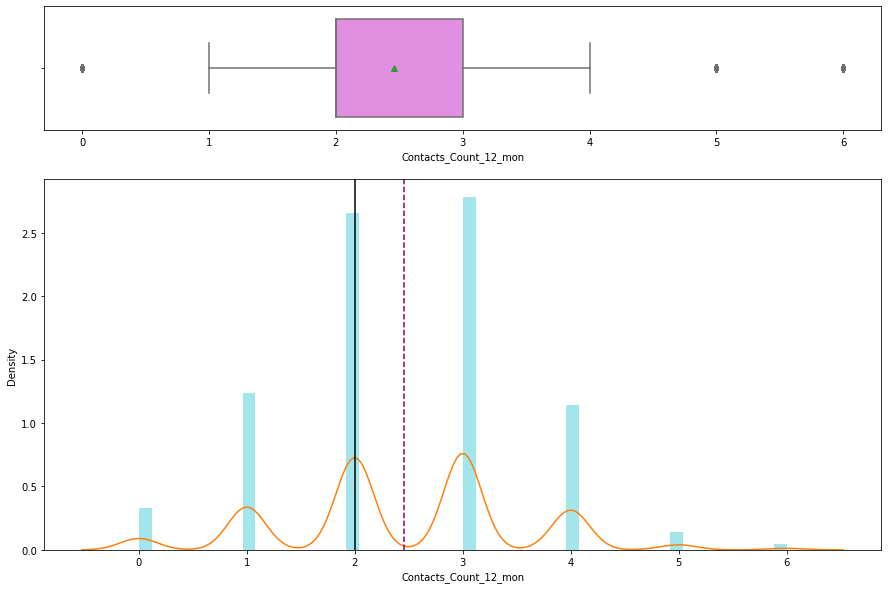

In [20]:
histogram_boxplot(data['Contacts_Count_12_mon'])

* Most of the customers contacted 2-3 times within 12 months.
* From the boxplot we can see that there are some outliers on both sides of the whiskers.

#### Observations on Credit_Limit

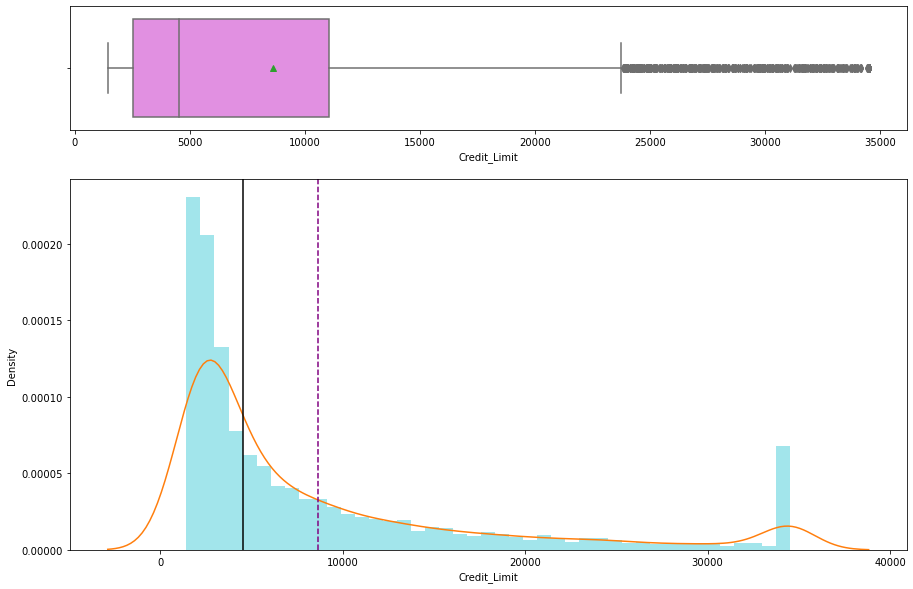

In [21]:
histogram_boxplot(data['Credit_Limit'])

* The distribution of Credit_Limit is skewed to the right.
* There are quite few customers with maximum Credit Limit of 35000.
* 50% of the customers have Credit Limit less than 5000.

#### Observations on Total_Revolving_Bal

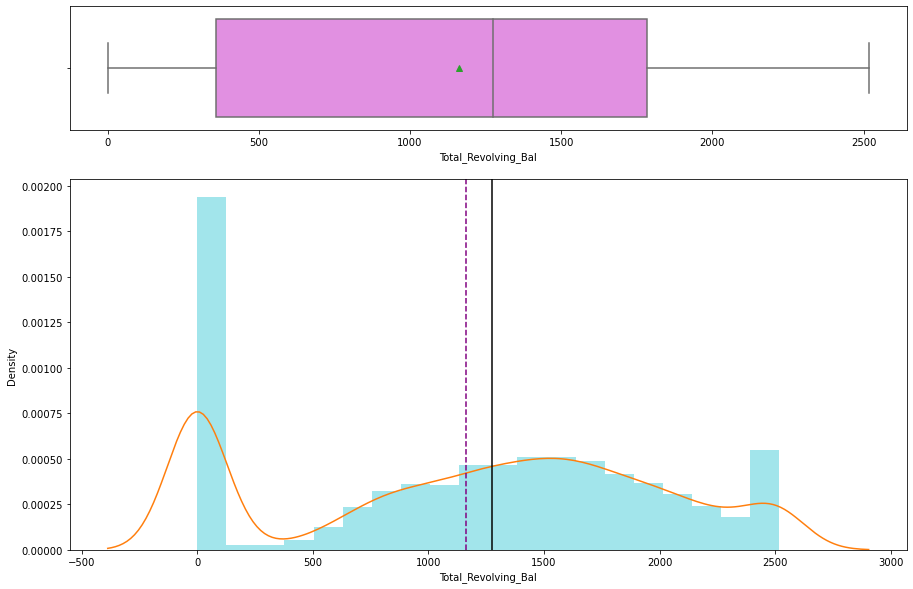

In [22]:
histogram_boxplot(data['Total_Revolving_Bal'])

* Most customers pay the complete dues of credit card and have 0 revolving balance.
* There are quite a few customers with a revolving balance of 2500.

#### Observations on Avg_Open_To_Buy

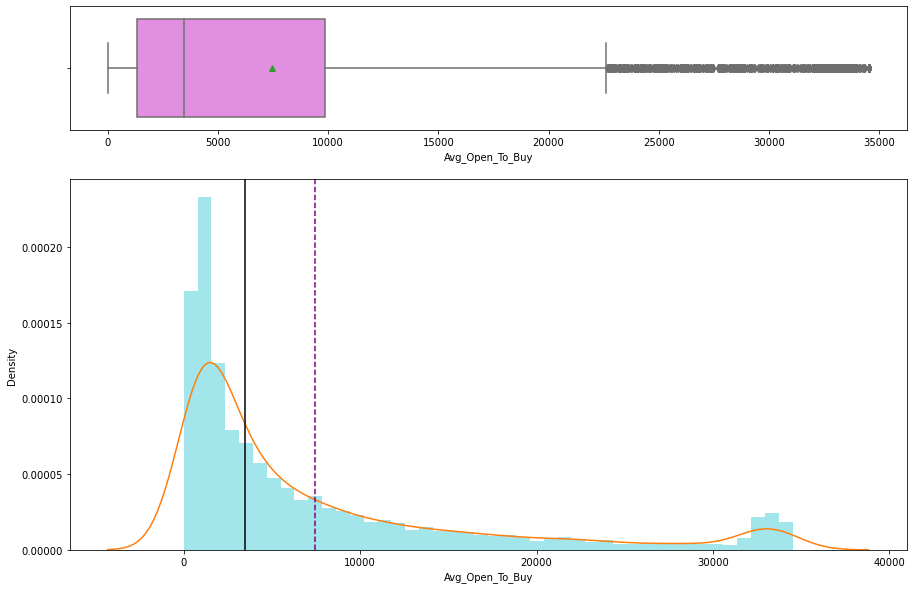

In [23]:
histogram_boxplot(data['Avg_Open_To_Buy'])

* The distribution of the Avg_Open_To_Buy column is right-skewed.
* A right-skewed distribution indicates that most customers used a big part of their limit while only a few customers (on the right tail) were left with a majority of their credit amount.

#### Observations on Total_Amt_Chng_Q4_Q1

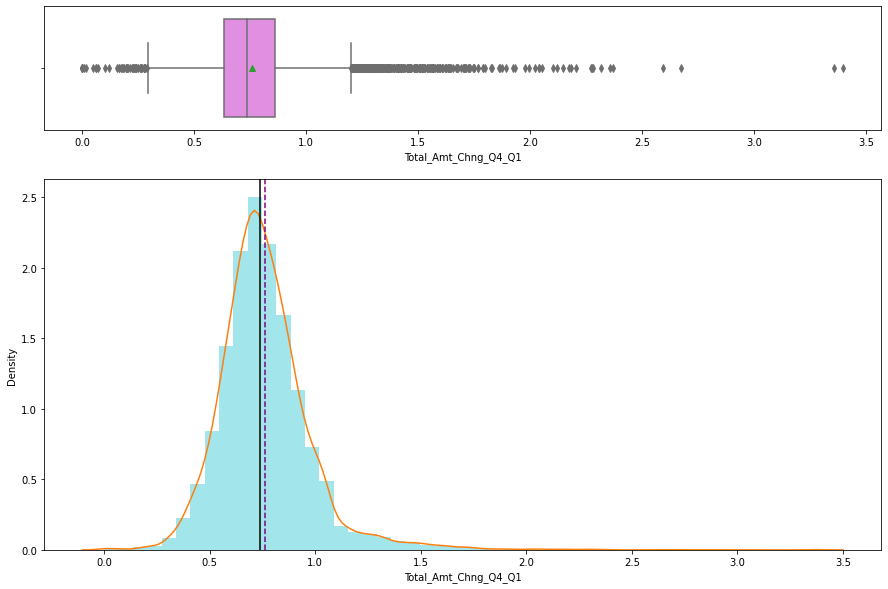

In [24]:
histogram_boxplot(data['Total_Amt_Chng_Q4_Q1'])

* The distribution of Total_Amt_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

#### Observations on Total_Trans_Amt

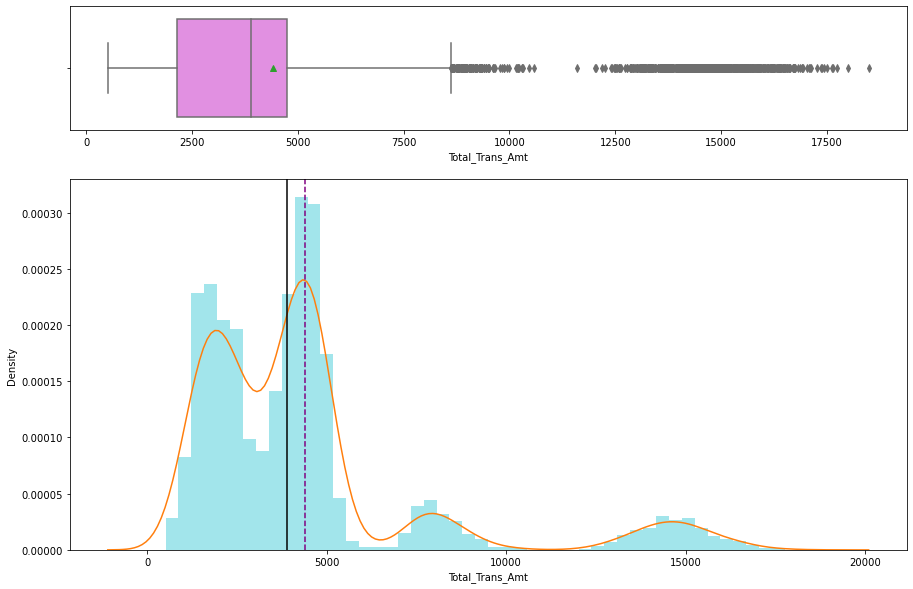

In [25]:
histogram_boxplot(data['Total_Trans_Amt'])

* The distribution of Total_Trans_Amt is skewed to the right.
* There are two peaks in data at total transaction amounts of one around 2500 and second around the mean value of 4500.
* From the boxplot, we can see that there are outliers - customers with more than 8000 total transaction amounts are being considered as outliers.

#### Observations on Total_Trans_Ct

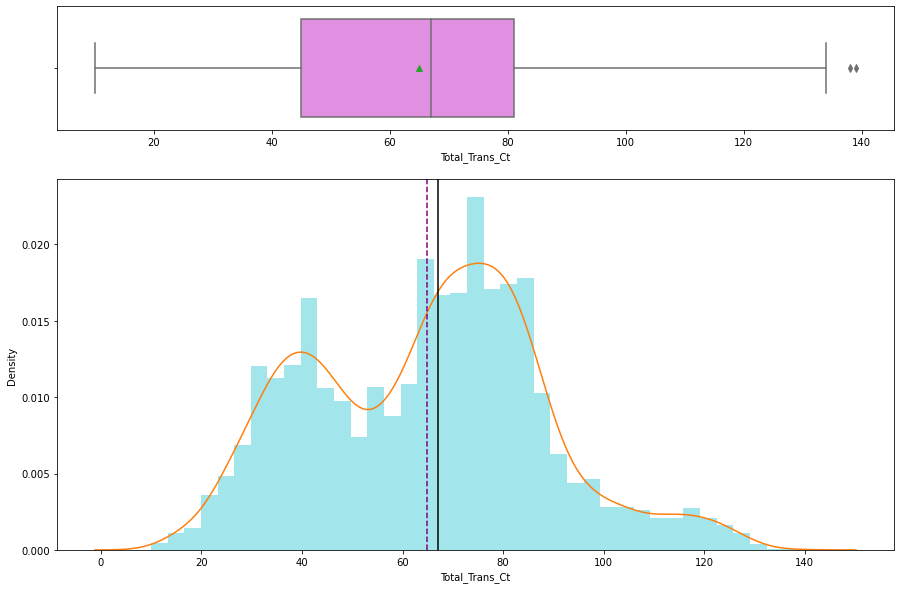

In [26]:
histogram_boxplot(data['Total_Trans_Ct'])

* The distribution of Total_Trans_Ct shows two peaks on 40 and 80 transactions in a year which indicates that customers used credit cards 3 to 6 times a month to make transactions.

#### Observations on Total_Ct_Chng_Q4_Q1

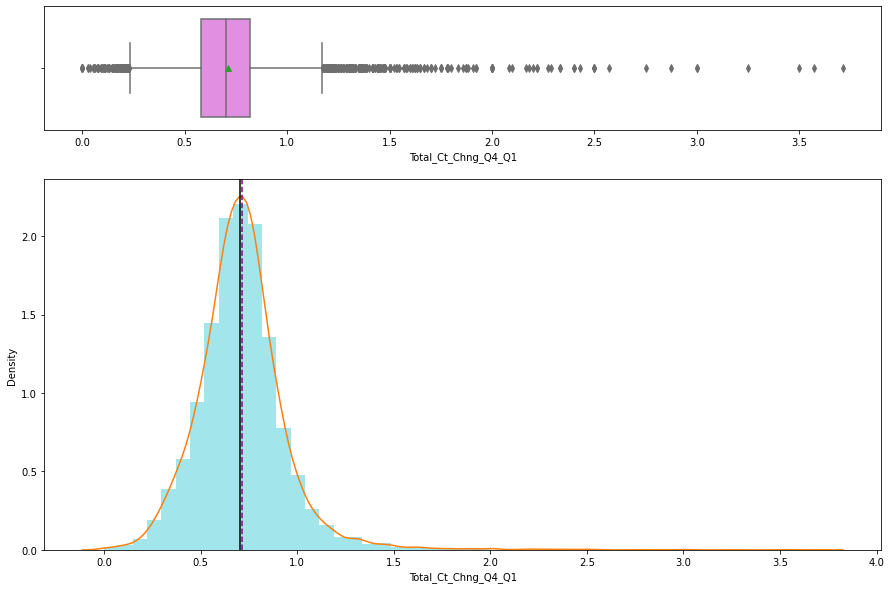

In [27]:
histogram_boxplot(data['Total_Ct_Chng_Q4_Q1'])

* The distribution of Total_Ct_Chng_Q4_Q1 looks normally distributed but there's a slight skew towards the right.
* From the boxplot, we can see that there are outliers on both sides of the whiskers.

#### Observations on Avg_Utilization_Ratio

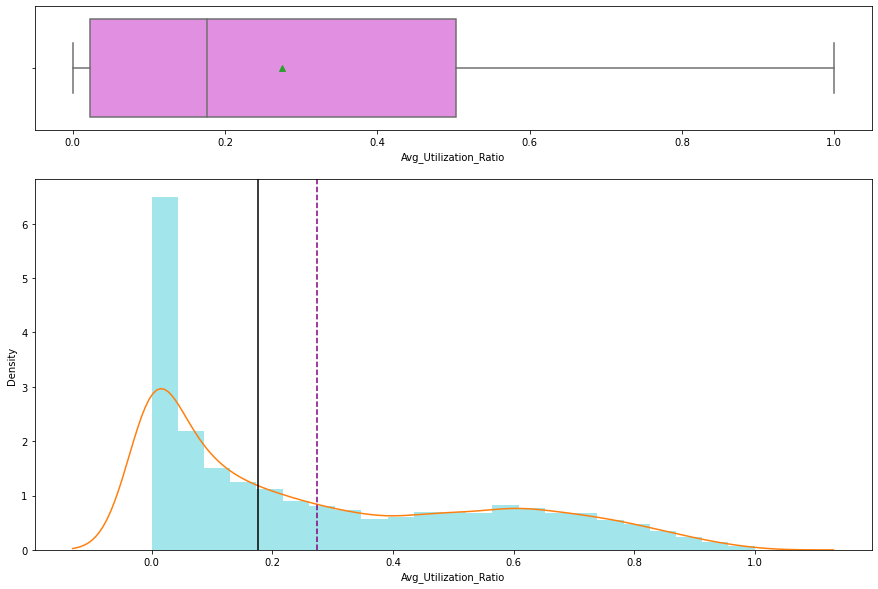

In [28]:
histogram_boxplot(data['Avg_Utilization_Ratio'])

* The distribution of Avg_Utilization_Ratio is skewed to the right.
* This distribution is not a positive sign for the bank as most of the customers are not utilizing their credit amount.

In [29]:
# Function to create barplots that indicate percentage for each category.

def per_on_bar(col):
    plt.figure(figsize=(15,6))
    ax = sns.countplot(data[col],palette='Paired')
    total = len(data[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2        # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12, ha='center') # annotate the percantage 
    plt.show()

#### Observations on Dependent_count

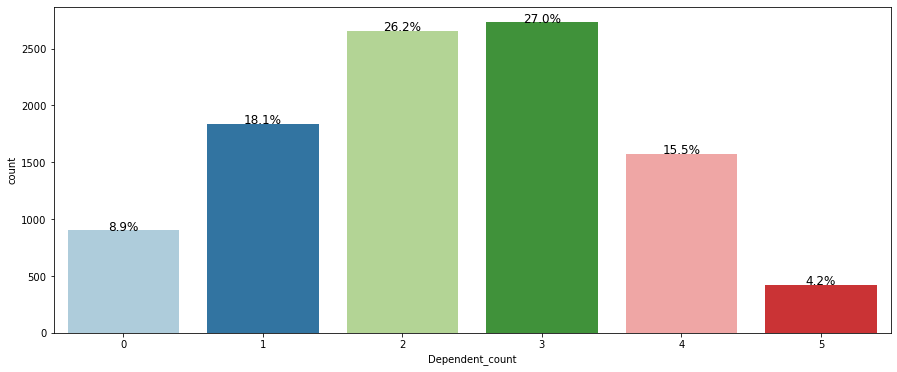

In [30]:
per_on_bar('Dependent_count')

* The distribution of dependents is very realistic with most customers having 2 or 3 dependents.

#### Observations on Total_Relationship_Count

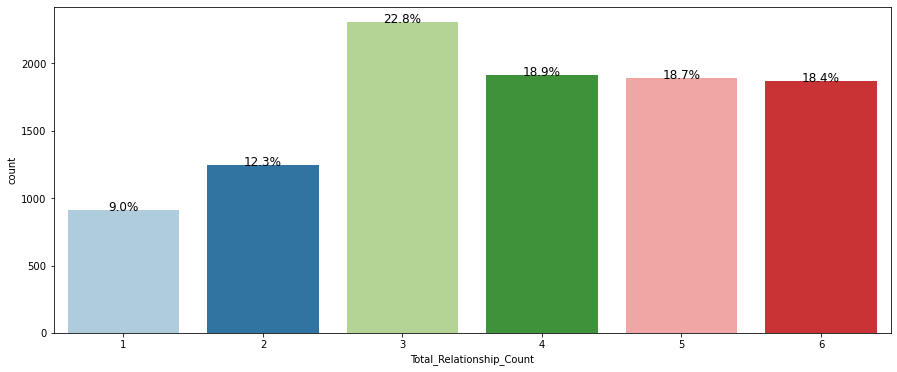

In [31]:
per_on_bar('Total_Relationship_Count')

* 22.8% of the customers are using 3 products offered by the bank while an equal percentage ~19% of customers use 4 or more than 4 products.
* Equal percentage of customers using 4,5 and 6 products might suggest that customers who opt or buy the 4th product will also be ready to buy more products.

#### Observations on Months_Inactive_12_mon

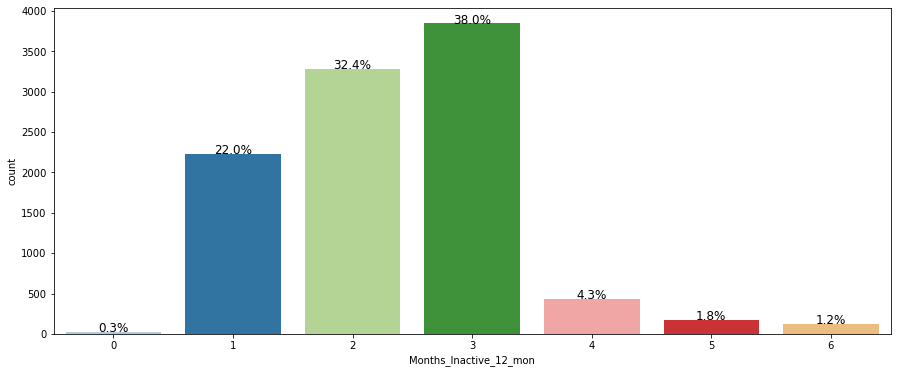

In [32]:
per_on_bar('Months_Inactive_12_mon')

* Maximum customers are inactive for 3 or less than three months.
* Only 7.3% of the customers were inactive for more than 3 months.

#### Observations on Contacts_Count_12_mon

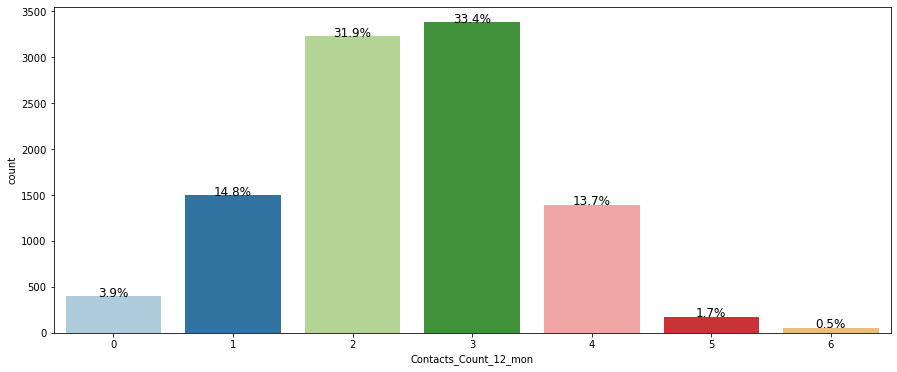

In [33]:
per_on_bar('Contacts_Count_12_mon')

* ~16% of the customers interacted with the bank more than 3 times in the past 12 months.
* Maximum customers interacted with the bank 2-3 times within a year.

#### Observations on Gender

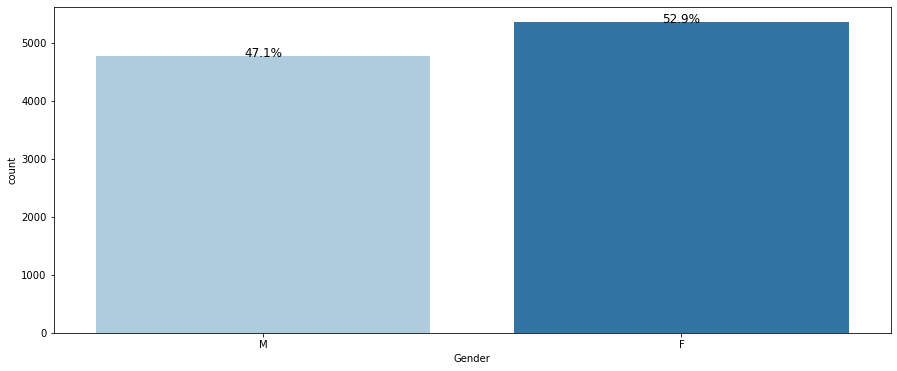

In [34]:
per_on_bar('Gender')

* We have an almost equal percentage of Male and Female customers.

#### Observations on Education_Level

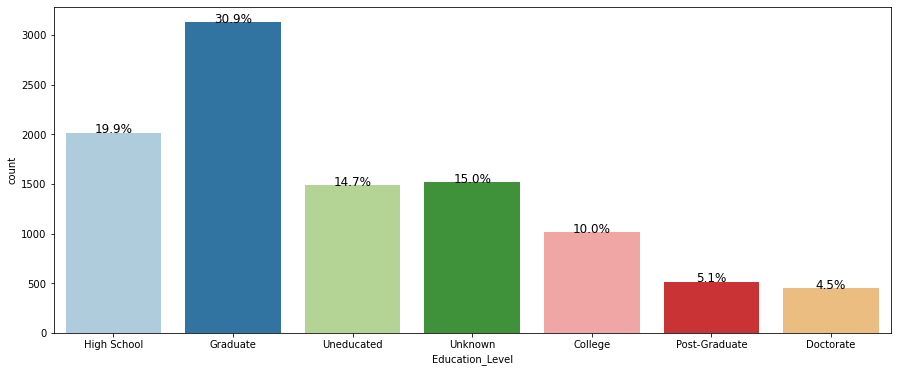

In [35]:
per_on_bar('Education_Level')

* 30.9% of the customers are graduates, followed by 19.9% of the customers who completed high school.
* Percentage of missing value in Education_Level column is 15%.

#### Observations on Marital_Status

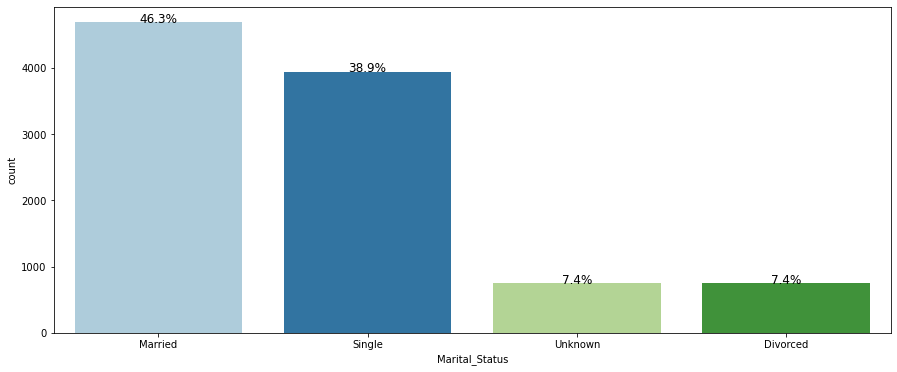

In [36]:
per_on_bar('Marital_Status')

* 46.3% of the customers are Married, followed by 38.9% of Single customers.
* Percentage of missing value in Marital_Status column is 7.4%.

#### Observations on Income_Category

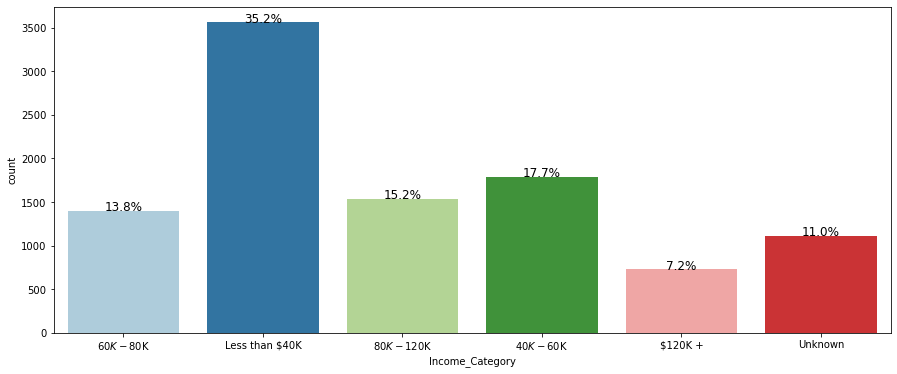

In [37]:
per_on_bar('Income_Category')

* 35.2% of the customers lie in the Less than 40k income category group, followed by 17.7% of the customers in the 40k-60k income group.
* Percentage of missing value in Income_Category column is 11%.

#### Observations on Card_Category

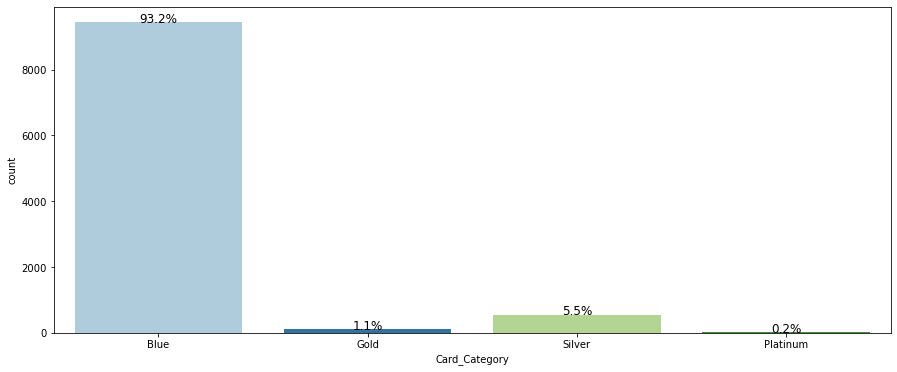

In [38]:
per_on_bar('Card_Category')

* 93.2% of the customers have the Blue card.
* Blue card would be a standard card given by the bank to all its customers.

#### Observations on Attrition_Flag

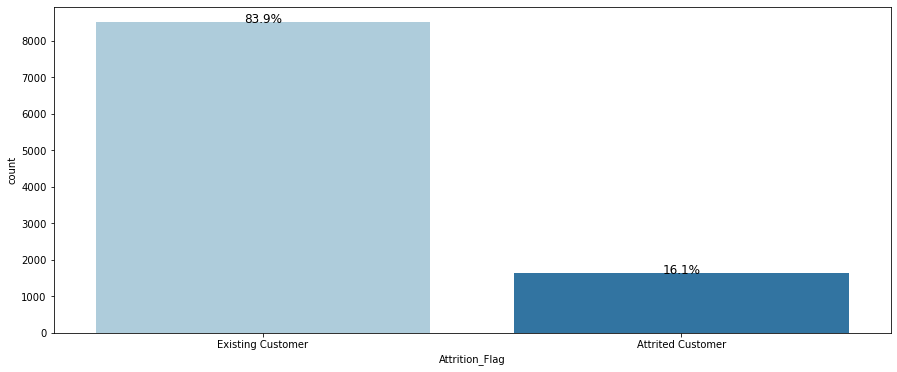

In [39]:
per_on_bar('Attrition_Flag')

* 16.1% of the customers attrited.